# 《文本分析》第一次课程作业文档

#学生姓名：李佳琪
#学号：2110010114

In [7]:
#导入包
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [8]:
#定义正弦函数
def sine_func(x):
    return np.sin(2*np.pi*x)
#定义多项式函数
def fit_func(p,x):    #p为数组
    f=np.poly1d(p)    #poly1d函数能根据输入的数组p生成一个多项式
    return f(x)

In [11]:
#评价差 error
def error_func(p,x,y):
    error=fit_func(p,x)-y   # error=将x值带入多项式后减去y值
    return error            #返回真实值与我们拟合的曲线上对应的值的差
x=np.linspace(0,1,10)  #linspace函数产生0-1之间的步长为0.1的数组
y_=sine_func(x)        
y=[np.random.normal(0,0.1)+y1 for y1 in y_] #得到加上噪点后的y值
print(y)

[-0.15719111498637642, 0.6877194041077457, 1.0815570342902012, 0.7710586821721672, 0.374963367331307, -0.5401925323521887, -0.7811989841550833, -1.0197743908542332, -0.5310902965202109, -0.0671621417849765]


parameters: [-0.0181311]


(array([-0.0181311]), 1)

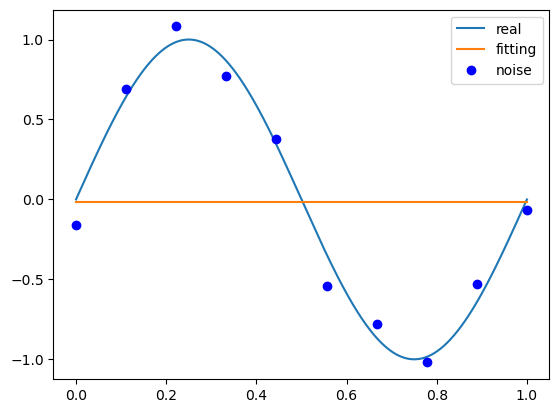

In [12]:
x_points=np.linspace(0,1,1000)
#leastsqura..
def fitting(M=0):                 #得到拟合M次的曲线
    p_init=np.random.rand(M+1)    #生成M+1个服从[0,1)均匀分布的随机样本值
    p_lsq=leastsq(error_func,p_init,args=(x, y))  # 最小二乘法函数 三个参数：误差函数、函数参数列表、数据点
    print('parameters:', p_lsq[0])              #p_lsp函数返回值的第一个为拟合曲线的参数
    plt.plot(x_points,sine_func(x_points),label='real')  # real曲线
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitting') #拟合曲线  
    plt.plot(x,y,'bo', label = 'noise')    #训练值样本点   'b0'画出蓝色的圆圈
    plt.legend()
    return p_lsq
fitting(M=0)


parameters: [-1.29818145  0.63095963]


(array([-1.29818145,  0.63095963]), 1)

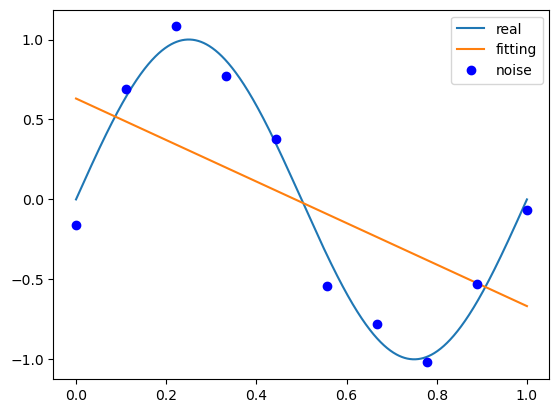

In [13]:
fitting(M=1)

parameters: [-53.47402356 122.65537561 -72.83532092  -5.21983129   8.96967705
  -0.15702508]


(array([-53.47402356, 122.65537561, -72.83532092,  -5.21983129,
          8.96967705,  -0.15702508]),
 1)

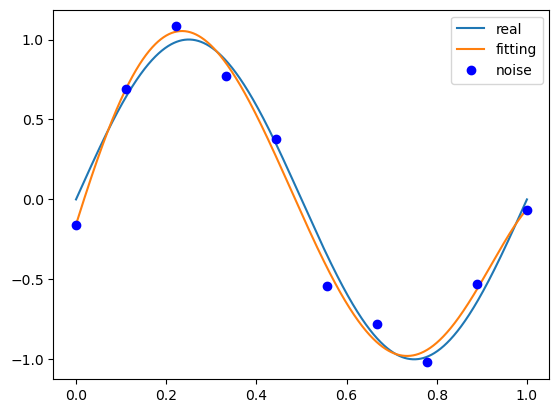

In [14]:
fitting(M=5)

parameters: [-5.28567339e+04  2.36726616e+05 -4.45227783e+05  4.56714270e+05
 -2.77573411e+05  1.01493994e+05 -2.15531389e+04  2.36975290e+03
 -9.34755498e+01 -1.57191115e-01]


(array([-5.28567339e+04,  2.36726616e+05, -4.45227783e+05,  4.56714270e+05,
        -2.77573411e+05,  1.01493994e+05, -2.15531389e+04,  2.36975290e+03,
        -9.34755498e+01, -1.57191115e-01]),
 2)

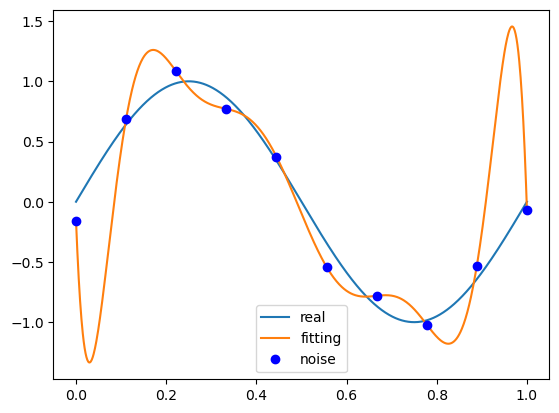

In [15]:
fitting(M=9)

In [19]:
lam=0.001
def error_plus_regu(p,x,y):
    error=y-fit_func(p,x)
    error=np.append(error,np.sqrt(0.5*lam*np.square(p)))   #sqrt函数 求算数平方根  square函数 平方
    return error 

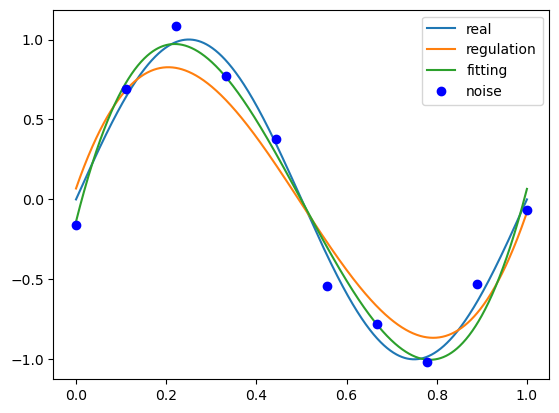

In [20]:
M=3
p_init=np.random.rand(M+1) 
p_lsq = leastsq(error_func, p_init, args=(x,y))
p_lsq_regu=leastsq(error_plus_regu,p_init,args=(x,y))  #添加正则项后的参数学习结果：p_lsq_regu
plt.plot(x_points,sine_func(x_points),label='real')   #follow sin函数的plot
plt.plot(x_points,fit_func(p_lsq_regu[0],x_points),label='regulation') #follow lasso的plot
plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitting')  # 原始fitting plot
plt.plot(x,y,'bo', label = 'noise')#训练值样本点
plt.legend()
